In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd

df = pd.read_csv("./yellow_cab_data/yellow_cab_data.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-01-01 00:17:55,2022-01-01 00:27:45,1.0,4.22,1.0,N,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25
1,2,2022-01-01 00:22:03,2022-01-01 00:25:37,1.0,0.69,1.0,N,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00
2,2,2022-01-01 00:52:33,2022-01-01 00:58:07,1.0,0.87,1.0,N,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00
3,2,2022-01-01 00:31:12,2022-01-02 00:00:58,1.0,3.03,1.0,N,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00
4,2,2022-01-01 00:05:26,2022-01-01 00:29:05,1.0,4.56,1.0,N,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,2022-01-31 23:13:58,2022-01-31 23:35:37,NaN,5.58,NaN,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN
149996,2,2022-01-31 23:31:00,2022-01-31 23:43:00,NaN,1.67,NaN,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN
149997,2,2022-01-31 23:10:00,2022-01-31 23:20:00,NaN,2.02,NaN,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN
149998,2,2022-01-31 23:53:00,2022-02-01 00:10:00,NaN,4.84,NaN,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN


<h1> Cleaning </h1>

In [8]:
datatypes = []
for col in df.columns:
    datatypes.append(str(type(df.loc[0,col])))
categ = []
for i in range(len(datatypes)):
    t = datatypes[i]
    if t == "<class 'numpy.int64'>" or t == "<class 'numpy.float64'>":
        pass
    else:    
        categ.append(df.columns[i])
#convert datetimes to integer values
df['tpep_pickup_float'] = pd.to_datetime(df[categ[0]]).map(pd.Timestamp.timestamp)
df['tpep_dropoff_float'] = pd.to_datetime(df[categ[1]]).map(pd.Timestamp.timestamp)
#convert binary store and fwd flag to int
def convert_yn(x):
    if x=="Y":
        return 1
    elif x=="N":
        return 0
    else:
        return np.nan
df['store_and_fwd_flag_bin'] = df[categ[2]].apply(convert_yn)
data = df.drop(categ, axis=1)
eda = data.dropna()
eda

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.0,0.5,0.5,0.00,0.0,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.5,0.5,0.5,1.66,0.0,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.5,0.5,0.5,2.32,0.0,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.0,0.5,0.5,0.00,0.0,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.5,0.5,0.5,4.46,0.0,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145714,2,1.0,1.14,1.0,239,151,1,5.5,0.5,0.5,2.32,0.0,0.3,11.62,2.5,0.00,1.643670e+09,1.643670e+09,0.0
145715,1,0.0,2.00,1.0,246,163,1,8.5,3.0,0.5,2.45,0.0,0.3,14.75,2.5,0.00,1.643673e+09,1.643674e+09,0.0
145716,1,1.0,1.70,1.0,249,107,1,8.0,3.0,0.5,1.00,0.0,0.3,12.80,2.5,0.00,1.643673e+09,1.643674e+09,0.0
145717,1,0.0,0.40,1.0,239,143,1,4.5,3.0,0.5,1.66,0.0,0.3,9.96,2.5,0.00,1.643670e+09,1.643670e+09,0.0


In [3]:
from matplotlib import pyplot as plt

(0.0, 100.0, -10.0, 400.0)

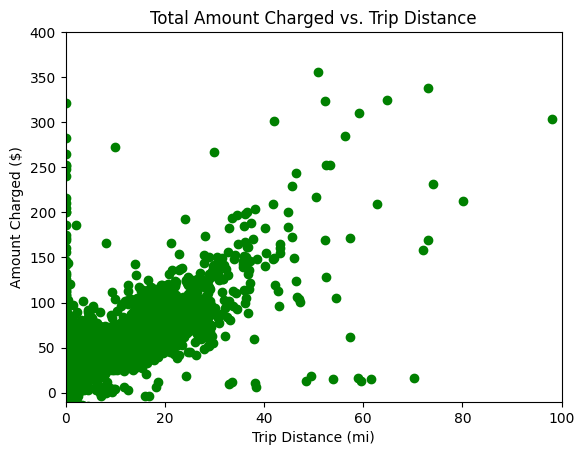

In [53]:

plt.scatter(eda["trip_distance"], eda["total_amount"], color="green")
plt.title("Total Amount Charged vs. Trip Distance")
plt.xlabel("Trip Distance (mi)")
plt.ylabel("Amount Charged ($)")
plt.axis([0, 100, -10, 400])


In [16]:
eda

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.0,0.5,0.5,0.00,0.0,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.5,0.5,0.5,1.66,0.0,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.5,0.5,0.5,2.32,0.0,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.0,0.5,0.5,0.00,0.0,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.5,0.5,0.5,4.46,0.0,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145714,2,1.0,1.14,1.0,239,151,1,5.5,0.5,0.5,2.32,0.0,0.3,11.62,2.5,0.00,1.643670e+09,1.643670e+09,0.0
145715,1,0.0,2.00,1.0,246,163,1,8.5,3.0,0.5,2.45,0.0,0.3,14.75,2.5,0.00,1.643673e+09,1.643674e+09,0.0
145716,1,1.0,1.70,1.0,249,107,1,8.0,3.0,0.5,1.00,0.0,0.3,12.80,2.5,0.00,1.643673e+09,1.643674e+09,0.0
145717,1,0.0,0.40,1.0,239,143,1,4.5,3.0,0.5,1.66,0.0,0.3,9.96,2.5,0.00,1.643670e+09,1.643670e+09,0.0


In [41]:
groups = eda.groupby(by="RatecodeID").mean()
bycode = groups.iloc[0:5,:]
bycode

,VendorID,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
RatecodeID,,,,,,,,,,,,,,,,,,
1.0,1.696744,1.384605,2.618983,166.972104,164.315377,1.229246,11.069229,1.031317,0.494343,2.158676,0.201607,0.296775,16.899013,2.310581,0.056999,1.642384e+09,1.642385e+09,0.024193
2.0,1.735396,1.540099,17.445507,140.653218,153.508663,1.238366,50.288119,1.548391,0.483168,8.519527,4.947428,0.290124,68.248168,2.093441,0.887067,1.642159e+09,1.642161e+09,0.014851
3.0,1.710843,1.574297,16.696225,149.413655,43.417671,1.361446,61.303213,0.198795,0.000000,9.445743,13.759478,0.283133,85.095783,0.010040,0.145582,1.642195e+09,1.642196e+09,0.016064
4.0,1.743719,1.467337,21.035678,140.110553,247.638191,1.361809,72.248744,0.629397,0.469849,7.720201,2.668392,0.296985,84.900402,0.226131,0.979899,1.642329e+09,1.642331e+09,0.015075
5.0,1.837596,1.419437,4.193517,159.450128,176.296675,1.240409,52.607673,0.049552,0.111253,6.467327,1.736765,0.276215,62.079987,0.719309,0.161445,1.642249e+09,1.642250e+09,0.024297


In [42]:
xlabels = ["Standard rate", "JFK", "Newark", "Nassau/Westchester", "Negotiated Fare"]

Text(0, 0.5, 'Trip Distance (mi)')

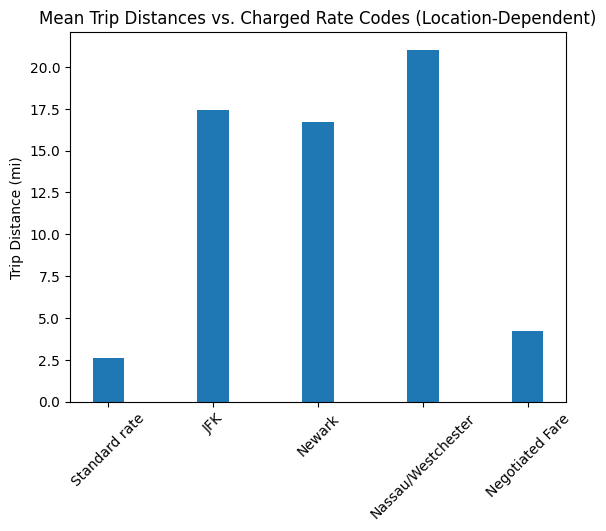

In [54]:
plt.bar(xlabels, bycode.trip_distance, width=0.3)
plt.xticks(rotation=45)
plt.title("Mean Trip Distances vs. Charged Rate Codes (Location-Dependent)")
plt.ylabel("Trip Distance (mi)")

In [52]:
eda

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.0,0.5,0.5,0.00,0.0,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.5,0.5,0.5,1.66,0.0,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.5,0.5,0.5,2.32,0.0,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.0,0.5,0.5,0.00,0.0,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.5,0.5,0.5,4.46,0.0,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145714,2,1.0,1.14,1.0,239,151,1,5.5,0.5,0.5,2.32,0.0,0.3,11.62,2.5,0.00,1.643670e+09,1.643670e+09,0.0
145715,1,0.0,2.00,1.0,246,163,1,8.5,3.0,0.5,2.45,0.0,0.3,14.75,2.5,0.00,1.643673e+09,1.643674e+09,0.0
145716,1,1.0,1.70,1.0,249,107,1,8.0,3.0,0.5,1.00,0.0,0.3,12.80,2.5,0.00,1.643673e+09,1.643674e+09,0.0
145717,1,0.0,0.40,1.0,239,143,1,4.5,3.0,0.5,1.66,0.0,0.3,9.96,2.5,0.00,1.643670e+09,1.643670e+09,0.0
